Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [1]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt



In [3]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

11490434/11490434 [==============================] - 1s 0us/step


**Preprocessing**

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.np_utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(lbl_test, num_classes)

As a first stage in the preprocessing procedure, the x train and x test elements are changed to float 32 type because Python / Operator gives output as float. Second, x train and x test contain a numerical representation of 28x28 pixel grayscale images of handwritten digits represented in a 28x28 numpy array. The gray scale pixels range in between 0 to 255, so x_train and x_test are divided by 255 to get the values between o and 1.  Lastly, y test and y train a numpy arrays that contains integers to represent the categories 0 to 9 has been transformed into a numpy array with binary values and as many columns as there are categories in the data using the method to categorical().

In [5]:

## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))
model.summary()

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.4582 - accuracy: 0.8704 - val_loss: 0.2547 - val_accuracy: 0.9275
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2255 - accuracy: 0.9345 - val_loss: 0.1842 - val_accuracy: 0.9458
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1715 - accuracy: 0.9499 - val_loss: 0.1578 - val_accuracy: 0.9532
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1401 - accuracy: 0.9588 - val_loss: 0.1341 - val_accuracy: 0.9605
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1194 - accuracy: 0.9652 - val_loss: 0.1171 - val_accuracy: 0.9636
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1042 - accuracy: 0.9690 - val_loss: 0.1052 - val_accuracy: 0.9674
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0927 - accuracy: 0.9728 - val_loss: 0.1088 - val_accuracy: 0.9670
Epoch 

2A)	How many layers does the network in the notebook have? How many neurons does each layer have? What activation functions and why are these appropriate for this application? What is the total number of parameters for the network? Why does the input and output layers have the dimensions they have?

The network has four layers, layer is build using the add function. The layers are as follows one input layer, two hidden layers and one output layer. 

The number of neurons in each layer are as follows:
input layers - 28x28 = 784
hidden layer one - 64
hidden layer two - 64
output layer - 10
So in total 784 + 64 + 64 + 10 = 922.

The activation function used in two hidden layers is relu and in output layer is softmax. For hidden layers we usually consider three different activation functions : Relu, Sigmoid and Hyberbolic. The biggest advantage of using ReLU is that it does not activate all the neurons at the same time and that a neuron will be activated if its value is greater than zero, for all the negative inputs function converts to zero and the neuron does not get activated. The model trained with ReLU converged quickly and thus takes much less time when compared to models, Speed is fast compare to other activation function and model accuracy will be excellent.

The total number of parameters for the network are: 
parameters between input and hidden layer one - 784x64 = 50176
parameters between hidden layer one and hidden layer two - 64x64 =4096
parameters between hideen layer two and output layer - 64x10 = 640
number os biases - 64+64+10 = 138
summing up all = 50176+4096+640+138 = 55050

The reason why the input have the dimension 784 is because there are 28∗28=784 pixels on the images. So one neuron in the first layer represents one pixel in the image. The output layer has 10 dimensions since it should represent the numbers 0,1,2,3,4,5,6,7,8,9 to show what integer the image represents.

2B) What loss-function is used to train the network? What is the functional form (mathematical expression) of the loss function? and how should we interpret it? Why is it appropriate for the problem at hand?

The loss function used to train network is categorical_crossentropy. The functional form of the loss fucntion is 

$$loss=−\sum_{i=1}^{10} \ y_i ∗log \hat{y_i}$$

In this equation, the target output vector is $y i$, the predicted output vector is $\hat y i$, and the loss is found by adding the products of the target output and predicted output vectors.

categorical crossentropy is used as a loss function in multi-class classification models with two or more output labels. The output label is given a single category encoding value between 0 and 1. We must predect the output between various classes in our problem ( 0 to 9). Therefore, categorical crossentropy is appropriate.



​

2C) Train the network for 10 epochs and plot the training and validation accuracy for each epoch.



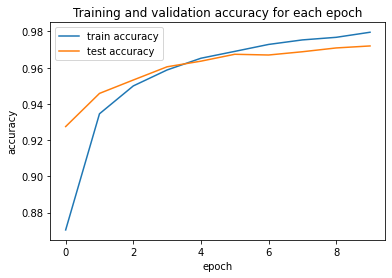

In [6]:
#Plotting the training and validation accuracy for each epoch
plt.plot(fit_info.history['accuracy'])
plt.plot(fit_info.history['val_accuracy'])
plt.title('Training and validation accuracy for each epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'test accuracy'], loc='upper left')
plt.show()

2D) Update model to implement a three-layer neural network where the hidden-layers has 500 and 300 hidden units respectively. Train for 40 epochs. What is the best validation accuracy you can achieve? – Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reach a validation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay (L2 regularization of weights (kernels): https://keras.io/api/layers/regularizers/). Implement weight decay on hidden units and train and select 5 regularization factors from 0.000001 to 0.001. Train 3 replicates networks for each regularization factor. Plot the final validation accuracy with standard deviation (computed from the replicates) as a function of the regularization factor. How close do you get to Hintons result? – If you do not get the same results, what factors may influence this? (hint: What information is not given by Hinton on the MNIST database that may influence Model training)

In [7]:
import numpy as np
epochs = 40
#5 regularization factors selection
regularization_factors = np.linspace(0.000001,0.001,5)
scores = []

for i in range(5):
        for _ in range(3):
                ## Define model ##
                model = Sequential()
                model.add(Flatten())
                # hideden layer1 having 500 hidden units
                model.add(Dense(500, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(regularization_factors[i])))
                # hideden layer2 having 300 hidden units
                model.add(Dense(300, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(regularization_factors[i])))
                # output layer
                model.add(Dense(num_classes, activation='softmax'))

                model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.SGD(lr = 0.1),
                metrics=['accuracy'],)
                
                fit_info = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(x_test, y_test))
                scores.append(model.evaluate(x_test, y_test, verbose=0))

print(scores)

Epoch 1/40


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


469/469 [==============================] - 7s 15ms/step - loss: 0.3980 - accuracy: 0.8899 - val_loss: 0.2237 - val_accuracy: 0.9350
Epoch 2/40
469/469 [==============================] - 7s 15ms/step - loss: 0.1876 - accuracy: 0.9462 - val_loss: 0.1594 - val_accuracy: 0.9540
Epoch 3/40
469/469 [==============================] - 7s 15ms/step - loss: 0.1375 - accuracy: 0.9605 - val_loss: 0.1280 - val_accuracy: 0.9629
Epoch 4/40
469/469 [==============================] - 7s 14ms/step - loss: 0.1088 - accuracy: 0.9694 - val_loss: 0.1291 - val_accuracy: 0.9616
Epoch 5/40
469/469 [==============================] - 7s 15ms/step - loss: 0.0884 - accuracy: 0.9753 - val_loss: 0.1016 - val_accuracy: 0.9698
Epoch 6/40
469/469 [==============================] - 7s 15ms/step - loss: 0.0752 - accuracy: 0.9787 - val_loss: 0.0924 - val_accuracy: 0.9738
Epoch 7/40
469/469 [==============================] - 7s 15ms/step - loss: 0.0634 - accuracy: 0.9821 - val_loss: 0.0824 - val_accuracy: 0.9744
Epoch 8/40

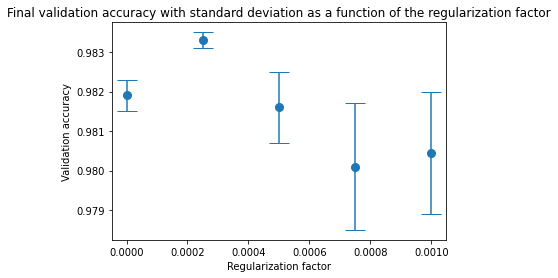

Maximum validation accuracy out of 5 regularization factors and 3 replicates networks:  0.9835000038146973
Hilton validation accuracy:  0.9847
Difference between maximum validation accuracy and Hilton validation accuracy:  0.001199996185302754


In [8]:
import pandas as pd
validation_accuracies = [x[1] for x in scores]

mean = []
std = []
for i in range (0,13,3):
    mean.append(np.mean(validation_accuracies[i:i+2]))
    std.append(np.std(validation_accuracies[i:i+2]))

regularization_factors = np.linspace(0.000001,0.001,5) #Same interval as code block above

plt.scatter(regularization_factors, mean)
plt.xlabel("Regularization factor")
plt.ylabel("Validation accuracy")
plt.title("Final validation accuracy with standard deviation as a function of the regularization factor")
plt.errorbar(regularization_factors, mean, std, linestyle='None', fmt='o', markersize=8, capsize=10)
plt.show()

print("Maximum validation accuracy out of 5 regularization factors and 3 replicates networks: ", np.max(validation_accuracies))
print("Hilton validation accuracy: ", 0.9847)
print("Difference between maximum validation accuracy and Hilton validation accuracy: ", 0.9847-np.max(validation_accuracies))

The model specified in the question yielded a maximum validation accuracy of 0.9829000234603882. There is a 0.0017999765396118361 discrepancy between the maximum validation accuracy and Hilton validation accuracy. The acquired accuracy is pretty close but not identical because accuracy may be affected by the learning rate and regularization factors that we choose. These regularization parameters were selected at random, therefore it could be better if they were chosen in accordance with the Hilton validation set but the information is not provided.

3A) Design a model that makes use of at least one convolutional layer – how performant a model can you get? -- According to the MNIST database it should be possible reach to 99% accuracy on the validation data. If you choose to use any layers apart from convolutional layers and layers that you used in previous questions, you must describe what they do. If you do not reach 99% accuracy, report your best performance and explain your attempts and thought process.




In [11]:
from keras import layers
from keras import models

model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))
model_cnn.add(layers.MaxPooling2D((2,2)))
model_cnn.add(layers.Conv2D(64,(3,3), activation='relu'))
model_cnn.add(layers.MaxPooling2D((2,2)))
model_cnn.add(layers.Conv2D(64,(3,3), activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(64,activation = 'relu'))
model_cnn.add(layers.Dense(10, activation= 'softmax'))

In [12]:
batch_size = 128
num_classes = 10
epochs = 10
model_cnn.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model_cnn.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model_cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 61s 128ms/step - loss: 0.5072 - accuracy: 0.8339 - val_loss: 0.1517 - val_accuracy: 0.9491
Epoch 2/10
469/469 [==============================] - 57s 122ms/step - loss: 0.1414 - accuracy: 0.9555 - val_loss: 0.0643 - val_accuracy: 0.9796
Epoch 3/10
469/469 [==============================] - 59s 126ms/step - loss: 0.1020 - accuracy: 0.9680 - val_loss: 0.0459 - val_accuracy: 0.9851
Epoch 4/10
469/469 [==============================] - 57s 122ms/step - loss: 0.0851 - accuracy: 0.9739 - val_loss: 0.0391 - val_accuracy: 0.9876
Epoch 5/10
469/469 [==============================] - 57s 122ms/step - loss: 0.0726 - accuracy: 0.9778 - val_loss: 0.0334 - val_accuracy: 0.9887
Epoch 6/10
469/469 [==============================] - 55s 118ms/step - loss: 0.0647 - accuracy: 0.9804 - val_loss: 0.0300 - val_accuracy: 0.9911
Epoch 7/10
469/469 [==============================] - 57s 122ms/step - loss: 0.0594 - accuracy: 0.9811 - val_loss: 0.0288 - val_ac

A) Design a model that makes use of at least one convolutional layer – how performant a model can you get? -- According to the MNIST database it should be possible reach to 99% accuracy on the validation data. If you choose to use any layers apart from convolutional layers and layers that you used in previous questions, you must describe what they do. If you do not reach 99% accuracy, report your best performance and explain your attempts and thought process.

To reach 99% validation accuracy on the validation data we have tried with multiple models. All the models we have tried involved more than one convolutonal layer and maxpooling-layer. But we have achived the 99 percent accuracy with the model having 3 convolution layers, 2 maxpooling layers, 1dropout layer, 1 input layer, 1 hidden layer and 1 output layer. The layers that used apart from the convolution layer and layers used in previous model is maxpooling layer and dropout layer. 

We used the maxpooling layer inorder to reduce the size of our inputs and also because the neighbouring pixels tend to have similar values. The max pooling is simple max operation that selects maximum value from a block of tensor. We apply maxpooling 2x2 which means slecting the maximum value from block of 2x2 pixels. The tensor block is moved completly through out the image. The reason is to downsample the input.

The dropout layer's job is to erratically deactivate some neurons. The input parameter is the frequency of deactivated neurons ( 0.5 in our case). Overfitting can be prevented by deactivating neurons.

3B) Discuss the differences and potential benefits of using convolutional layers over fully connected ones for the particular application? 

Convolutional layers are mostly used to enhance our capacity to extract predictive features from picture data, enabling us to more precisely identify visual objects. The layer might be able to detect edges or circles at a basic level, but at a high level, it might be able to identify faces, hands, or full numerals. Each neuron in the completely connected layer has a unique weight connecting it to each input neuron. The weights in a Conv layer, however, are distributed among various neurons. This is also another factor that makes it possible to use Conv layers while dealing with a huge number of neurons. Convolutional layers also produce compressed image representations, which lowers the number of parameters that our dense sequential layers will need to handle. This parameter reduction increases the effectiveness of learning and significantly lowers our danger of overfitting.






### Question 4) Auto-Encoder for denoising


4A) The notebook implements a simple denoising deep autoencoder model. Explain what the model does: use the data-preparation and model definition code to explain how the goal of the model is achieved. Explain the role of the loss function? Draw a diagram of the model and include it in your report. Train the model with the settings given.



The autoencoder model uses an encoder and a decoder to successively compress and decompress images with and without noise while mapping images with or without noise to the appropriate integer. In order to prepare the images with noise, noise is added randomly by assigning random bits from zero to one to the training data and testing data using the "salt and pepper function." The neural network then makes an effort to denoise and rebuild the image. The distance between the distance between the original images and their corresponding reconstruction after the autoencoding is described as loss. The model therefore attempts to minimise this loss using a loss function in order to create the greatest quality results and to force the autoencoder model to match decoded images with original image.


In [13]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [14]:

latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [15]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))


Epoch 1/32
938/938 [==============================] - 12s 12ms/step - loss: 0.1904 - val_loss: 0.1522
Epoch 2/32
938/938 [==============================] - 9s 10ms/step - loss: 0.1465 - val_loss: 0.1391
Epoch 3/32
938/938 [==============================] - 9s 9ms/step - loss: 0.1373 - val_loss: 0.1343
Epoch 4/32
938/938 [==============================] - 8s 9ms/step - loss: 0.1323 - val_loss: 0.1305
Epoch 5/32
938/938 [==============================] - 8s 9ms/step - loss: 0.1290 - val_loss: 0.1280
Epoch 6/32
938/938 [==============================] - 10s 10ms/step - loss: 0.1267 - val_loss: 0.1263
Epoch 7/32
938/938 [==============================] - 8s 9ms/step - loss: 0.1251 - val_loss: 0.1255
Epoch 8/32
938/938 [==============================] - 10s 11ms/step - loss: 0.1238 - val_loss: 0.1247
Epoch 9/32
938/938 [==============================] - 12s 13ms/step - loss: 0.1229 - val_loss: 0.1241
Epoch 10/32
938/938 [==============================] - 9s 10ms/step - loss: 0.1221 - val_lo

4B) Add increasing levels of noise to the test-set using the salt_and_pepper()-function (0 to 1). Use matplotlib to visualize a few examples (3-4) in the original, “seasoned” (noisy), and denoised versions (Hint: for visualization use imshow(), use the trained autoencoder to denoise the noisy digits). At what noise level does it become difficult to identify the digits for you? At what noise level does the denoising stop working?

We have selected the 4 images randomly from the data, and increases noise in  the scale of 10% starting from 0 to 1 and tested using salt_and_pepper function. The test results are shown using the matplotlib as follows: the first row contains test images, the second row contains test photos augmented with noise, and the third row contains decoded images. The human eye finds it very challenging to recognize the digit in images with noise levels above 0.5. From noise 0.8, the denoising stopped working completely; some photos for noise 0.5, 0.6, and 0.7 are also improperly denoised. Therefore, when noise reaches 0.5, denoising also stopped working.


In [16]:
def plot(array,array1, array2):
   
    n = 4

    indices = np.random.randint(len(array1), size=n)
    test = array[indices, :]
    noise = array1[indices, :]
    dnoise = array2[indices, :]

    plt.figure(figsize=(25, 4))
    for i, (test,noise, dnoise) in enumerate(zip(test,noise, dnoise)):
        #subplot of test images
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(test.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        #subplot of noise test images
        ax = plt.subplot(3, n, i + 1+n)
        plt.imshow(noise.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        #subplot of denoised testimages
        ax = plt.subplot(3, n, i + 1 + n*2)
        plt.imshow(dnoise.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

313/313 [==============================] - 1s 3ms/step
Noise: 0


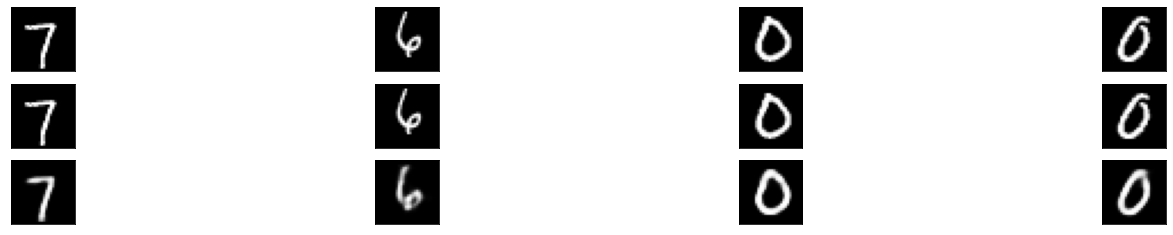

313/313 [==============================] - 1s 2ms/step
Noise: 0.1


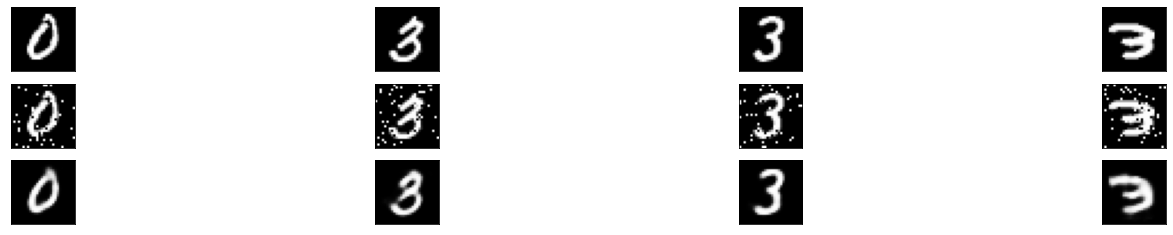

313/313 [==============================] - 1s 3ms/step
Noise: 0.2


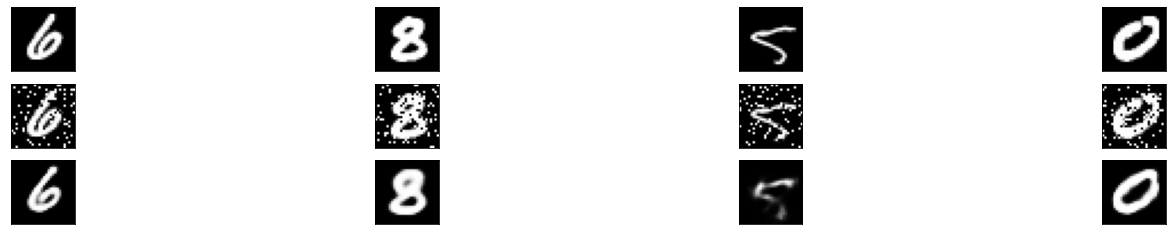

313/313 [==============================] - 1s 3ms/step
Noise: 0.3


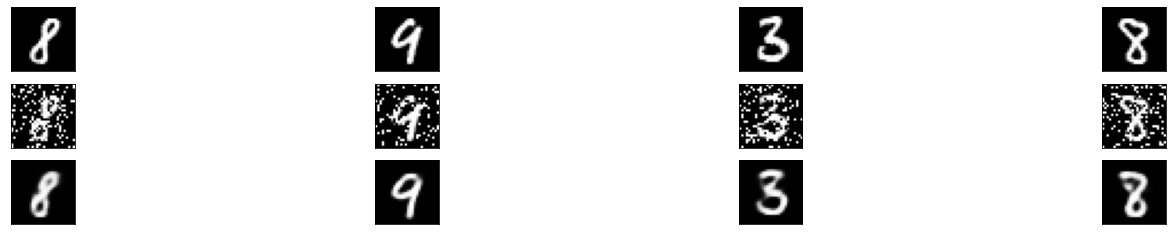

313/313 [==============================] - 1s 3ms/step
Noise: 0.4


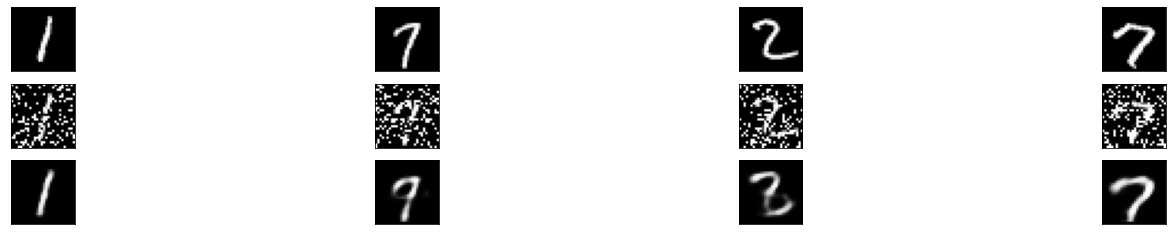

313/313 [==============================] - 1s 3ms/step
Noise: 0.5


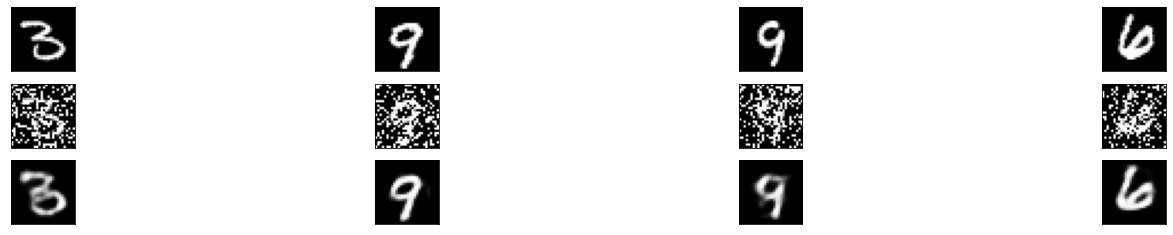

313/313 [==============================] - 1s 3ms/step
Noise: 0.6


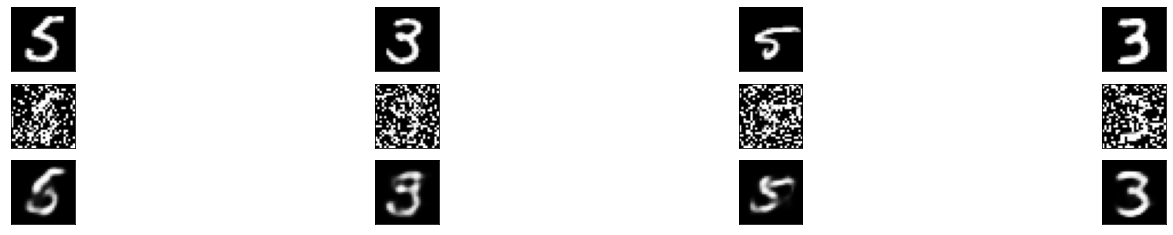

313/313 [==============================] - 1s 3ms/step
Noise: 0.7


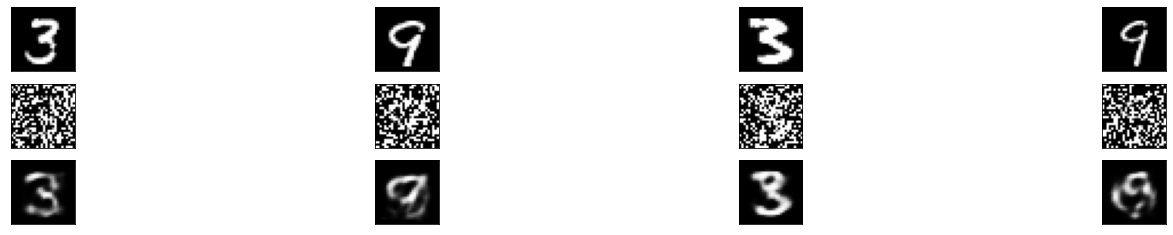

313/313 [==============================] - 1s 3ms/step
Noise: 0.8


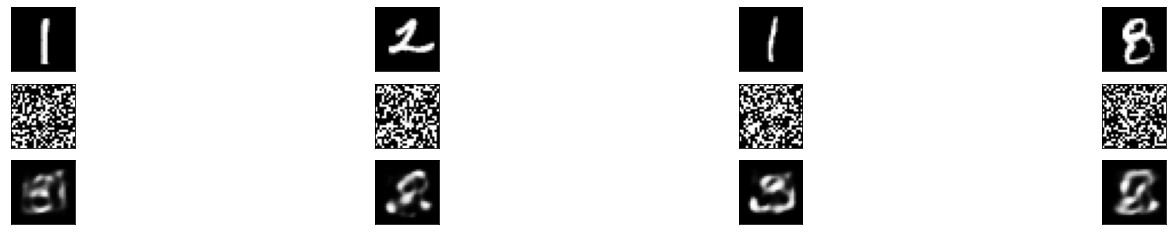

313/313 [==============================] - 1s 3ms/step
Noise: 0.9


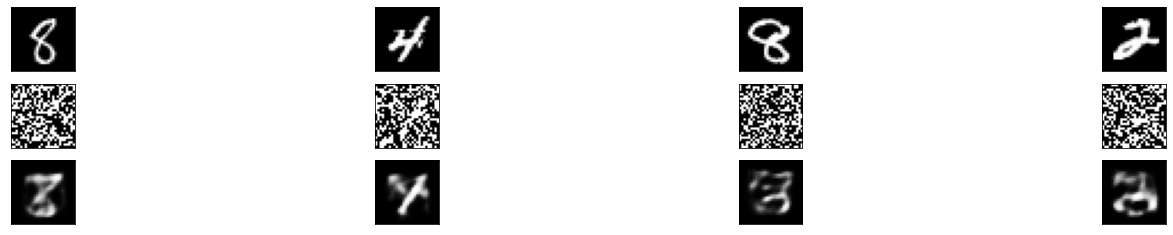

313/313 [==============================] - 1s 3ms/step
Noise: 1


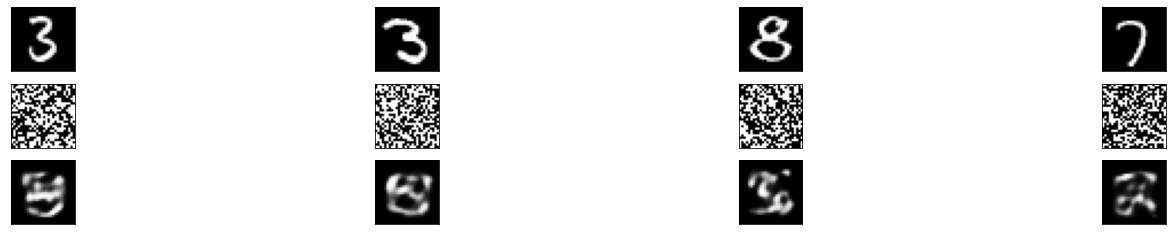

In [17]:
noise = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
denoised_scores = []
seasoned_scores = []
for j in range (len(noise)):
    #Adding noise to the image
    flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise[j])
    #denoising the noise image
    predictions = autoencoder.predict(flattened_x_test_seasoneed)
    print("Noise: " + str(noise[j]))
    plot(x_test,flattened_x_test_seasoneed, predictions)
    predictions_reshaped = predictions.reshape(len(predictions), 28, 28, 1)
    x_test_seasoneed = flattened_x_test_seasoneed.reshape(len(flattened_x_test_seasoneed), 28, 28, 1)
    denoised_scores.append(model_cnn.evaluate(predictions_reshaped, y_test, verbose=0))
    seasoned_scores.append(model_cnn.evaluate(x_test_seasoneed, y_test, verbose=0))

4C) Test whether denoising improves the classification with the best performing model you obtained in questions 2 or 3. Plot the true-positive rate as a function of noise-level for the seasoned and denoised datasets – assume that the correct classification is the most likely class-label. Discuss your results.  

Taking the accuracy as the true positive rate, the accuracy is computed for both the seasoned and denoised images using the model described in question 3. When noise is between 0 and 0.1, the true positive rate of the seasoned images is higher than that of the denoised images. Sometimes trained models make mistakes, or this is due to denoising an image without any noise, which might make the digit less obvious than simply using the image directly. However, the denoised images are categorized more accurately than the seasoned images in the noise interval between 0.2 and 0.8. This demonstrates how effective autoencoders can be, in reducing noise and providing an accurate assessment of images. The true positive rate is almost nil for both noised and denoised images at a noise level of 1. This is because very little of the original image is retained and instead, all of the pixels are set at random.

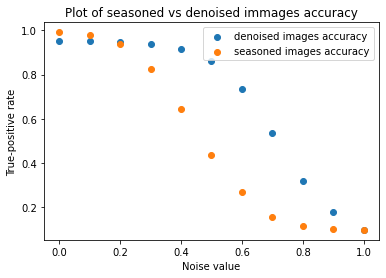

In [18]:
denoised_scores_accuracies = [x[1] for x in denoised_scores]
seasoned_scores_accuracies = [x[1] for x in seasoned_scores]
plt.scatter(noise, denoised_scores_accuracies, label = 'denoised images accuracy')
plt.scatter(noise, seasoned_scores_accuracies, label = 'seasoned images accuracy')
plt.xlabel("Noise value")
plt.ylabel("True-positive rate")
plt.title("Plot of seasoned vs denoised images accuracy")
plt.legend()
plt.show()

4D) Explain how you can use the decoder part of the denoising auto-encoder to generate synthetic “hand-written” digits? – Describe the procedure and show examples in your report.

